In [25]:
import pandas as pd
from river import stats

# Load the data
df = pd.read_csv('ultraspeed.zip', compression='zip')

#read as normal csv
#df = pd.read_csv('Partitioned LCL Data\Small LCL Data\LCL-June2015v2_0.csv')


In [26]:

# Filter out the rows where stdorToU is 'ToU'
df = df[df['stdorToU'] != 'ToU']


# Drop the unnecessary column
df.drop('stdorToU', axis=1, inplace=True)


# Convert the 'KWH/hh (per half hour) ' column to a numeric type
df['KWH/hh (per half hour) '] = pd.to_numeric(df['KWH/hh (per half hour) '], errors='coerce')

# Group by DateTime and calculate the mean energy consumption for each group
df = df.groupby('DateTime')['KWH/hh (per half hour) '].mean().reset_index()

# Rename the columns for clarity
df.rename(columns={'DateTime': 'DateTime', 'KWH/hh (per half hour) ': 'MeanEnergyConsumption'}, inplace=True)

# Convert the 'DateTime' column to datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Save the processed data to a new CSV file
df.to_csv('processed_data.csv', index=False)

                      DateTime MeanEnergyConsumption
0  2011-12-06 13:00:00.0000000                  None
1  2011-12-06 13:30:00.0000000                  None
2  2011-12-06 14:00:00.0000000                  None
3  2011-12-06 14:30:00.0000000                  None
4  2011-12-06 15:00:00.0000000                  None


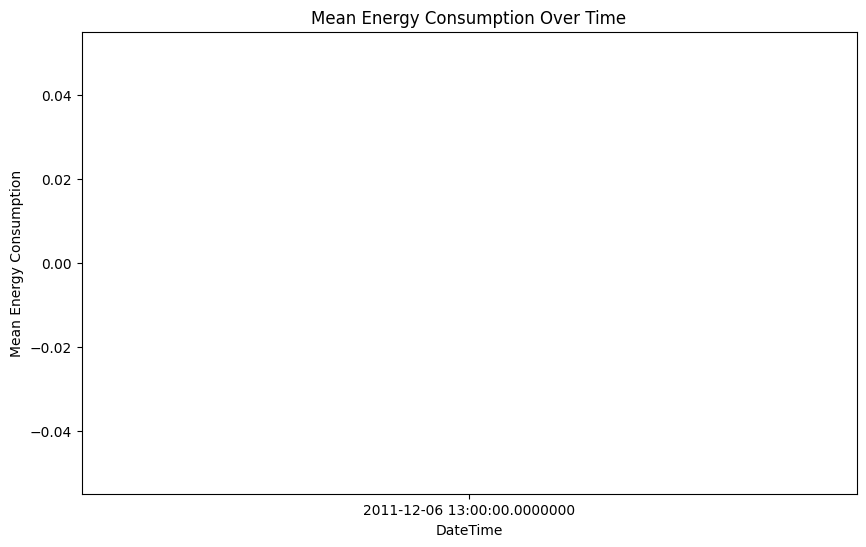

In [22]:
import matplotlib.pyplot as plt
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['DateTime'], df['MeanEnergyConsumption'])
plt.xlabel('DateTime')
plt.ylabel('Mean Energy Consumption')
plt.title('Mean Energy Consumption Over Time')
plt.show()
